In [5]:
library(rstan)
library(rstanarm)
library(bayesplot)

Warning message:
"package 'rstan' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.4.4"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.
Warning message:
"package 'rstanarm' was built under R version 3.4.4"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.4.4"rstanarm (Version 2.18.2, packaged: 2018-11-08 22:19:38 UTC)
- Do not expect the default priors to remain the same in future 

### The data

Let's use the motortrend car mpg dataset for our example problem


In [1]:
cardata <- mtcars
head(cardata)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### The traditional approach
If we wanted to know how some of these variables relate to cars fuel efficiency (mpg), we might fit a multiple linear regression with ols

In [3]:
summary(lm(mpg~cyl+wt+qsec,data=cardata))


Call:
lm(formula = mpg ~ cyl + wt + qsec, data = cardata)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5937 -1.5621 -0.3595  1.2097  5.5500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.4291     8.1912   3.593 0.001238 ** 
cyl          -0.9277     0.6113  -1.518 0.140280    
wt           -3.8616     0.9138  -4.226 0.000229 ***
qsec          0.4945     0.3863   1.280 0.211061    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.54 on 28 degrees of freedom
Multiple R-squared:  0.8396,	Adjusted R-squared:  0.8224 
F-statistic: 48.86 on 3 and 28 DF,  p-value: 2.979e-11


And we might conclude that there is:
* a significant negative relationship between car weight and miles-per-gallon
* no correlation between mpg and cylinder # 
* no correlation between mpg and 1/4 mile time

### An equivalent approach with Bayesian regression 

Our model:
\begin{aligned}
mpg &= \beta_0 + \beta_1*cyl + \beta_2*wt + \beta_3*qt + \epsilon \\
\epsilon &\sim \text{Normal}(0,\sigma)
\end{aligned}

Using rstan:

In [6]:
# Put our model's data in a list (the form rstan requires)
stanData <- list(N = nrow(cardata), mpg = cardata$mpg, cyl = cardata$cyl,wt = cardata$wt,
                 qsec = cardata$qsec)


#run the analysis
fit <- stan('fixed_effects_model.stan', data = stanData, iter = 2000, chains = 4, cores = 1)



SAMPLING FOR MODEL 'fixed_effects_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.189 seconds (Warm-up)
Chain 1:                1.01 seconds (Sampling)
Chain 1:                2.199

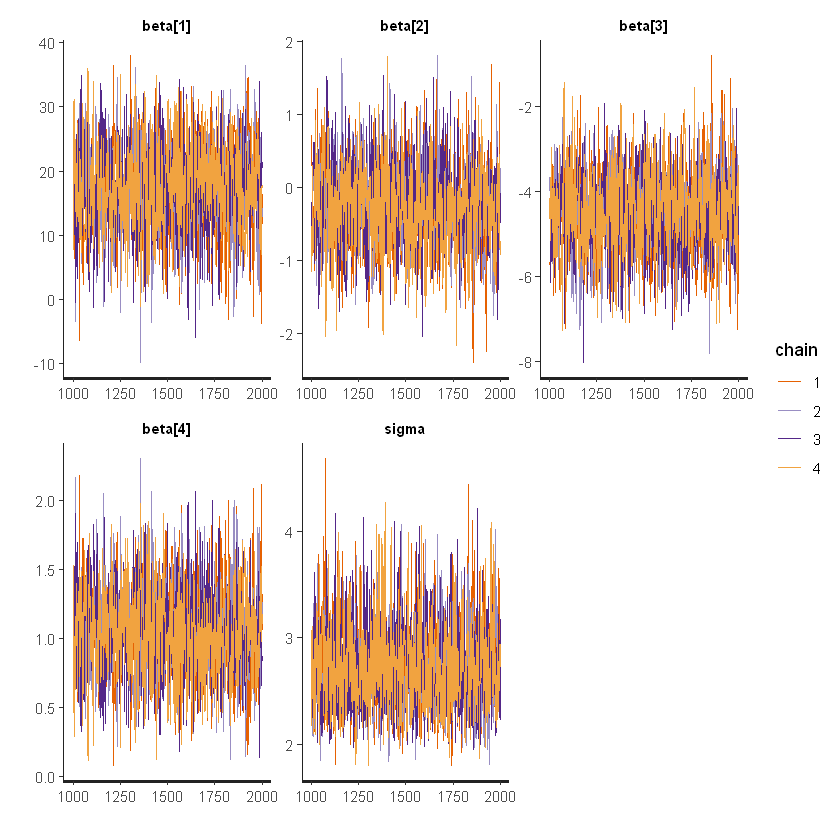

In [7]:
#look at the MCMC trace
traceplot(fit)

In [9]:
#text based summary
summary(fit)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[1],17.3616643,0.196124129,6.7818222,3.2815987,12.8397071,17.5313521,22.0547464,29.9687147,1195.723,1.001996
beta[2],-0.2412633,0.017295099,0.5774490,-1.3453188,-0.6325306,-0.2441348,0.1360388,0.8939418,1114.759,1.005598
beta[3],-4.5263185,0.026837901,0.9494177,-6.3675370,-5.1485192,-4.5077242,-3.9016213,-2.6543227,1251.462,1.005101
beta[4],1.0494114,0.009314094,0.3253383,0.4385686,0.8276014,1.0406880,1.2620274,1.7224238,1220.083,1.002063
sigma,2.7201868,0.009567638,0.3960568,2.0765758,2.4377733,2.6760852,2.9510901,3.6283544,1713.585,1.001780
lp__,-48.5212965,0.045711420,1.6954311,-52.6505625,-49.3937224,-48.1851276,-47.2619394,-46.2810562,1375.659,1.003704


ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


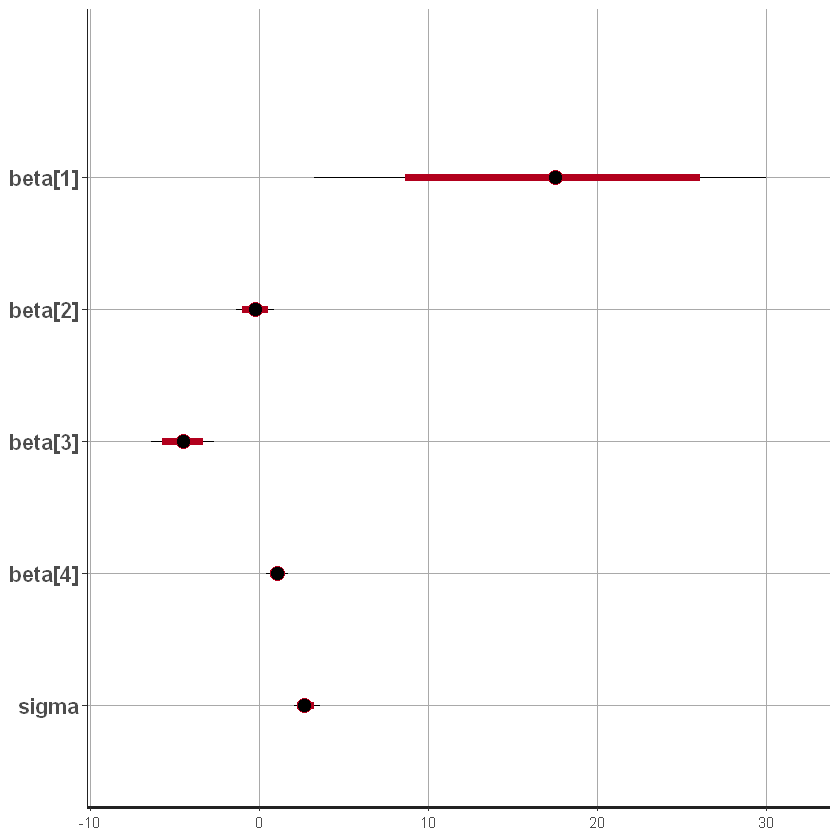

In [10]:
#posterior credible intervals
plot(fit)

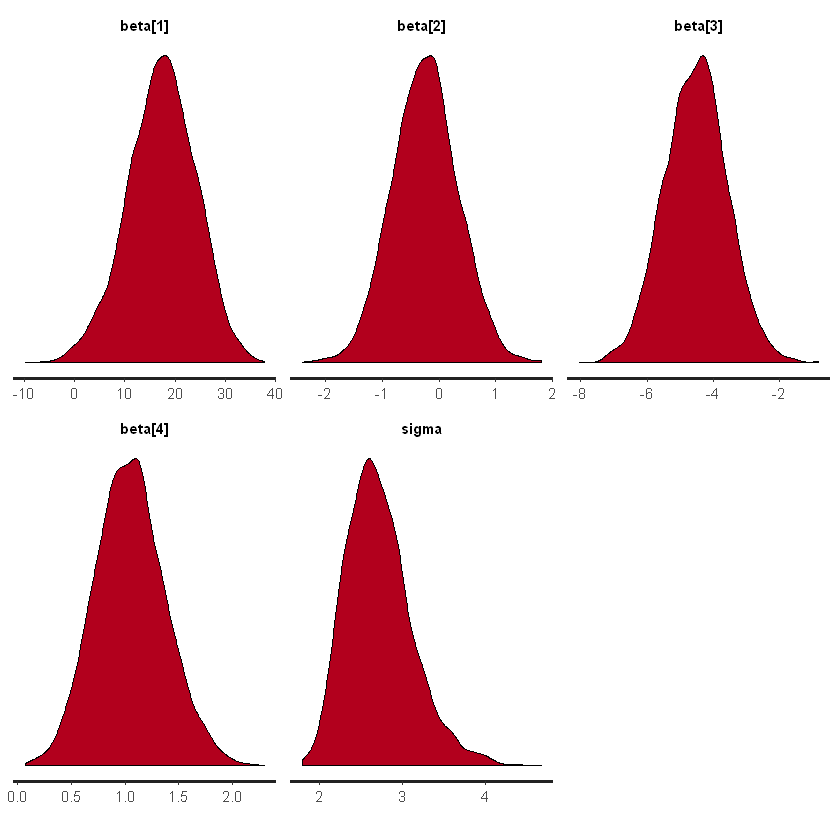

In [11]:
#posterior densities
plot(fit, plotfun = 'dens')

From our Bayesian regression we might conclude:
* Significant negative rel. between car weight and mpg (95% confidence that the true slope is below 0)
* Significant positive rel. between 1/4 mile time and mpg (95% confidence that the true slope is above 0)
* No significant rel. between cyl # and mpg

##### Now using rstanarm, a warpper to rstan that tries to make bayesian regression as easy as ols regression:

In [14]:
fit2 <- stan_glm(mpg ~ cyl+wt+qsec, data = cardata, cores=1)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.266 seconds (Warm-up)
Chain 1:                0.216 seconds (Sampling)
Chain 1:                0.482 seconds

In [15]:
summary(fit2)


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      mpg ~ cyl + wt + qsec
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 32
 predictors:   4

Estimates:
                mean   sd    2.5%   25%   50%   75%   97.5%
(Intercept)    29.5    8.4  13.0   24.0  29.5  35.1  46.5  
cyl            -0.9    0.6  -2.2   -1.3  -0.9  -0.5   0.2  
wt             -3.8    0.9  -5.7   -4.4  -3.9  -3.2  -2.0  
qsec            0.5    0.4  -0.3    0.2   0.5   0.8   1.3  
sigma           2.6    0.4   2.0    2.4   2.6   2.8   3.5  
mean_PPD       20.1    0.7  18.8   19.7  20.1  20.5  21.4  
log-posterior -85.0    1.7 -89.1  -85.8 -84.6 -83.7 -82.8  

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.2  1.0  1931 
cyl           0.0  1.0  1637 
wt            0.0  1.0  1736 
qsec          0.0  1.0  1863 
sigma         0.0  1.0  2513 
mean_PPD      0.0  1.0  3073 
log-posterior 0.0  1.0  1575 


In [16]:
prior_summary(fit2) #we can see the default priors stanarm used

Priors for model 'fit2' 
------
Intercept (after predictors centered)
 ~ normal(location = 0, scale = 10)
     **adjusted scale = 60.27

Coefficients
 ~ normal(location = [0,0,0], scale = [2.5,2.5,2.5])
     **adjusted scale = [ 8.44,15.40, 8.43]

Auxiliary (sigma)
 ~ exponential(rate = 1)
     **adjusted scale = 6.03 (adjusted rate = 1/adjusted scale)
------
See help('prior_summary.stanreg') for more details

The rstanarm package supports prettier plots when combined with the bayesplot package

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

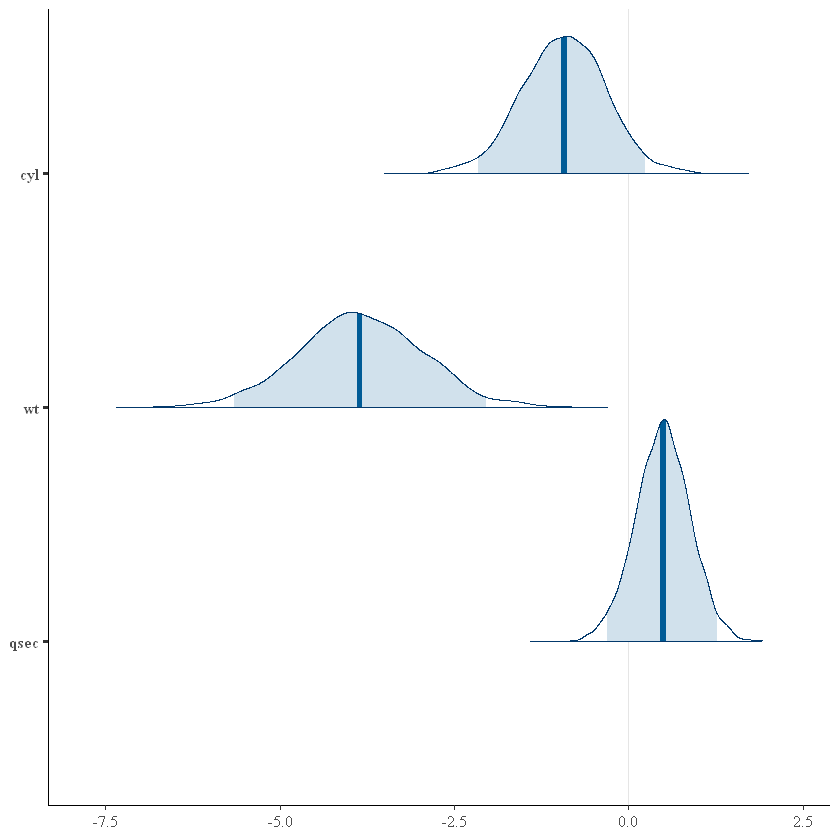

In [17]:
posterior <- as.matrix(fit2)
mcmc_areas(posterior,prob=0.95, pars=c('cyl', 'wt', 'qsec'))

rbayesarm provides a nice posterior_predict function that takes samples from our posterior to make predictions. 

We can use this in combination with the bayesplot package to make a nice 'posterior preditive check' to see if our model is fitting the real data well

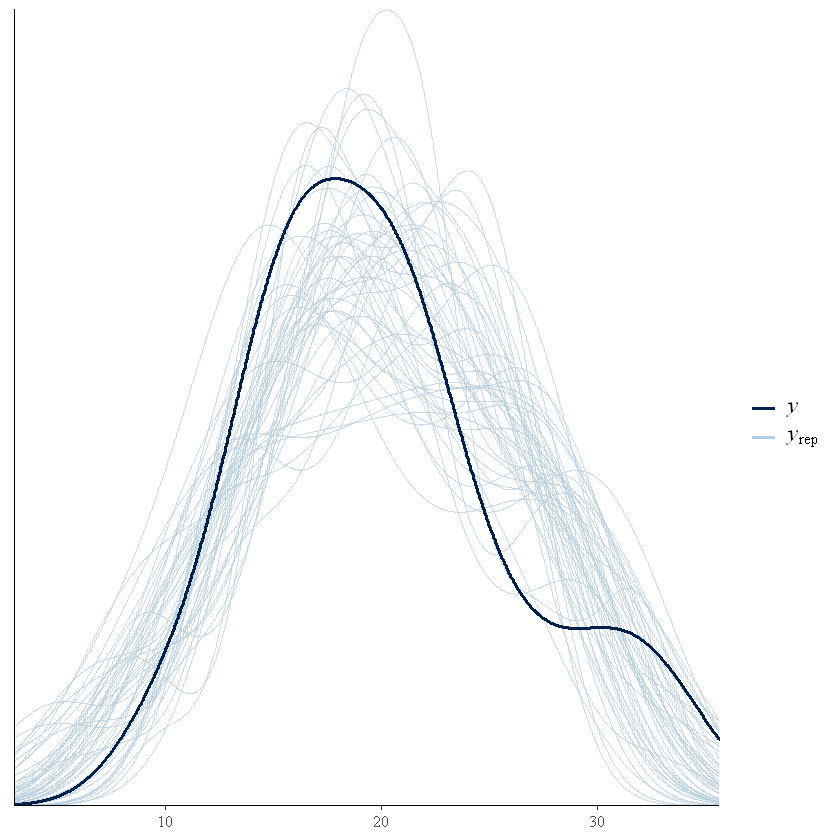

In [18]:
ppc_dens_overlay(y=cardata$mpg, yrep = posterior_predict(fit2,draws=50))

### Now let's try fitting mixed effects models, also known as hierarchical models

Instead of treating cylinder # as a continuous predictor, let's treat 4 6 and 8 cylinder cars as different groups and fit random intercepts for each one. These random intercepts will be drawn from the same (normal) distribution with a s.d. that we will fit. 

Our model:
\begin{aligned}
mpg &= \beta_0 + \beta_1*cyl + \beta_2*wt + \beta_3*qt + b_1*cyl_4 + b_2*cyl_6 + b_3*cyl_8 + \epsilon \\
b_i &\sim \text{Normal}(0,\tau) \\
\epsilon &\sim \text{Normal}(0,\sigma) \\
\end{aligned}

In [22]:
#original rstan
fit_mixed2 <- stan('mixed_model.stan', data = stanData, iter = 3000, chains = 4, cores = 1,
                   control = list(adapt_delta = 0.99))


recompiling to avoid crashing R session



SAMPLING FOR MODEL 'mixed_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 3000 [  0%]  (Warmup)
Chain 1: Iteration:  300 / 3000 [ 10%]  (Warmup)
Chain 1: Iteration:  600 / 3000 [ 20%]  (Warmup)
Chain 1: Iteration:  900 / 3000 [ 30%]  (Warmup)
Chain 1: Iteration: 1200 / 3000 [ 40%]  (Warmup)
Chain 1: Iteration: 1500 / 3000 [ 50%]  (Warmup)
Chain 1: Iteration: 1501 / 3000 [ 50%]  (Sampling)
Chain 1: Iteration: 1800 / 3000 [ 60%]  (Sampling)
Chain 1: Iteration: 2100 / 3000 [ 70%]  (Sampling)
Chain 1: Iteration: 2400 / 3000 [ 80%]  (Sampling)
Chain 1: Iteration: 2700 / 3000 [ 90%]  (Sampling)
Chain 1: Iteration: 3000 / 3000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 4.166 seconds (Warm-up)
Chain 1:                2.095 seconds (Sampling)
Chain 1:                6.261 second

Warning message:
"There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.99 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

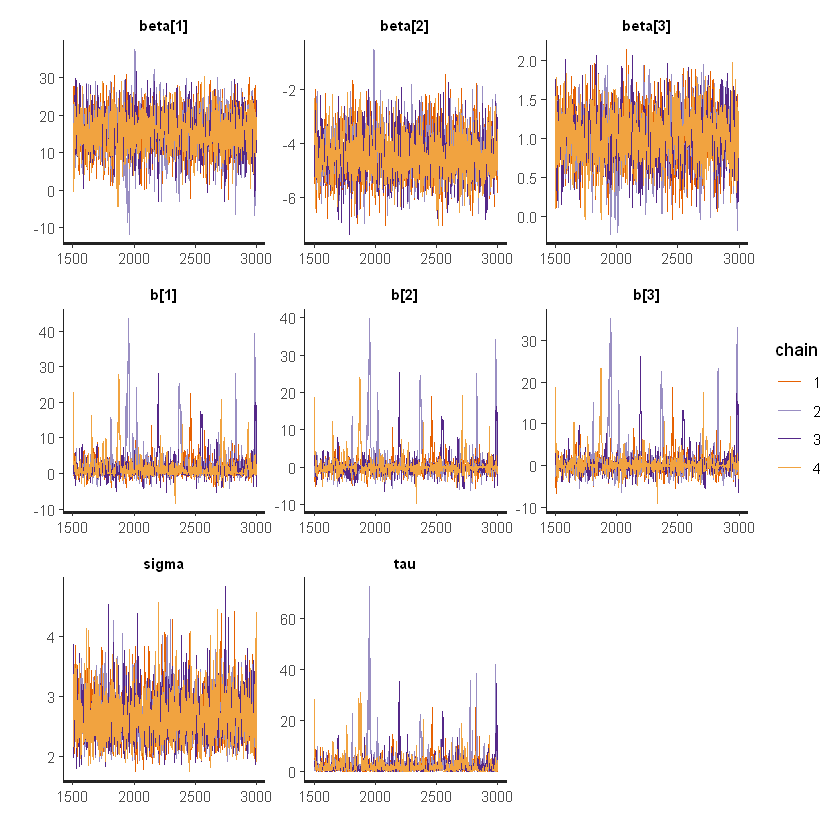

In [23]:
#look at the trace
traceplot(fit_mixed2)

In [25]:
#text based summary
summary(fit_mixed2)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta[1],15.4349591,0.151637740,5.4353220,4.1061923,12.10571701,15.59179528,19.0900683,25.605287,1284.8012,1.000691
beta[2],-4.4823589,0.019072630,0.7929929,-5.9308471,-5.00680954,-4.53074888,-4.0022281,-2.780254,1728.6913,1.001620
beta[3],1.0135233,0.009793653,0.3304716,0.3447991,0.80045598,1.02353878,1.2337047,1.657626,1138.6198,1.004343
b[1],1.7853845,0.201206761,3.8078940,-1.5928069,0.04508049,0.78480461,2.1683512,12.587454,358.1662,1.009087
b[2],0.3678179,0.178626748,3.3655217,-3.2500896,-0.83392438,-0.12507680,0.5068835,9.757119,354.9865,1.007402
b[3],0.5826376,0.168913587,3.2452021,-3.1111645,-0.61670780,0.03692971,0.8584573,9.202732,369.1087,1.006360
sigma,2.6626170,0.007254243,0.3770613,2.0471428,2.39904746,2.61887306,2.8774494,3.515105,2701.7159,1.000722
tau,2.5811080,0.191076427,3.8708342,0.1047543,0.74239119,1.54829394,2.9143851,12.377417,410.3883,1.007909
lp__,-49.7699463,0.129305571,2.9858504,-56.3890601,-51.54087633,-49.52255091,-47.7800748,-44.328694,533.2141,1.006218


ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)


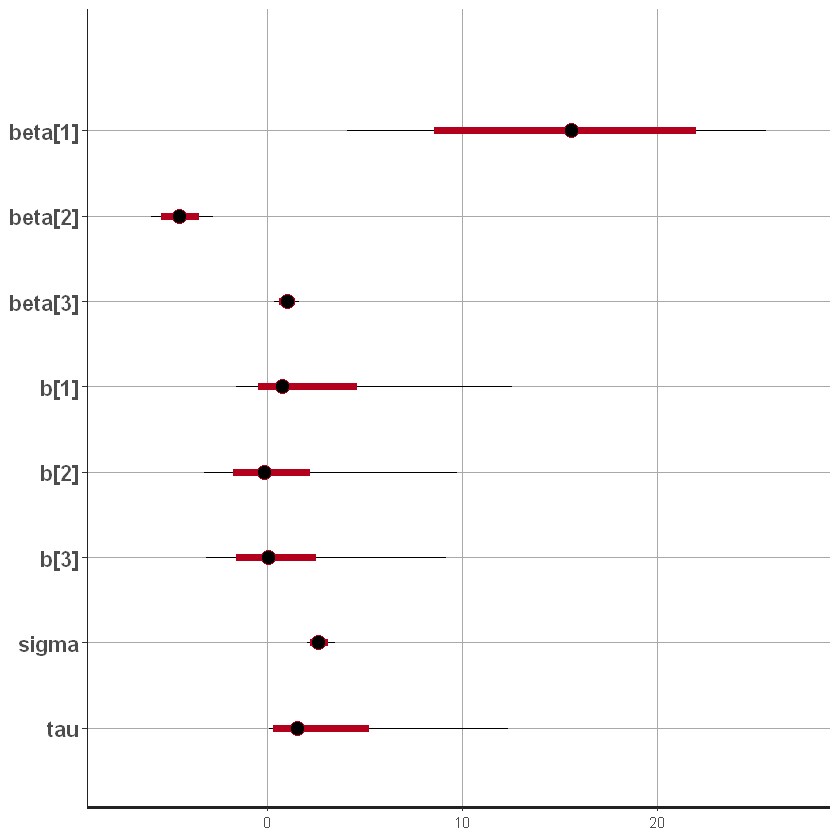

In [26]:
#posterior credible intervals
plot(fit_mixed2)

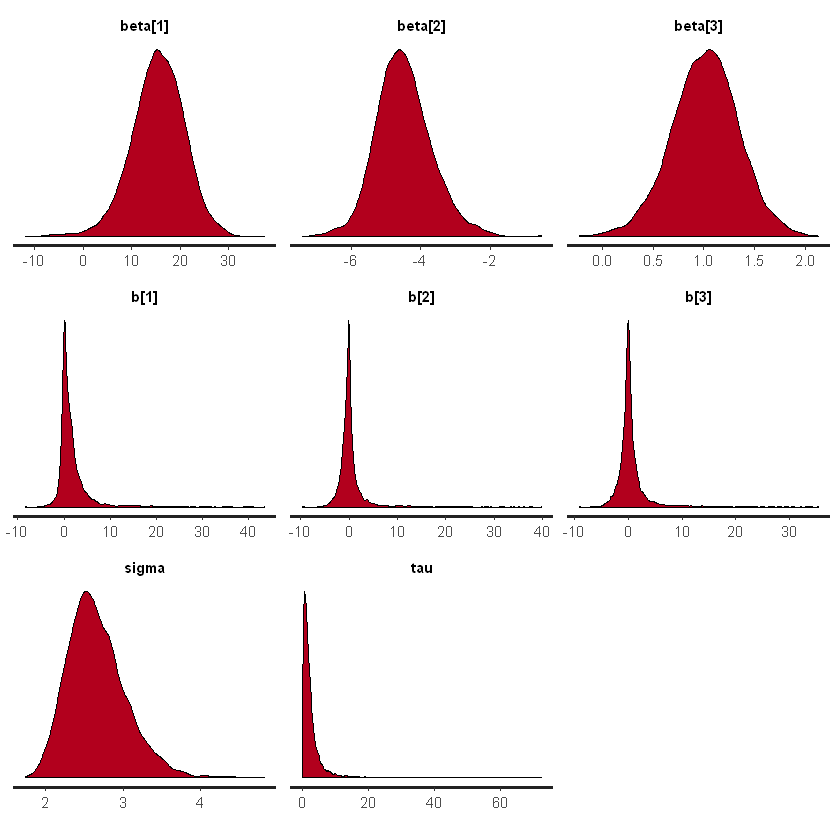

In [27]:
#posterior densities
plot(fit_mixed2, plotfun = 'dens')

##### Now with rstanarm:

In [28]:
fit_mixed <- stan_glmer(mpg ~  wt + qsec + (1|cyl),data=cardata, cores=1, control = list(adapt_delta = 0.99))

Warning message:
"'rBind' is deprecated.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects"


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.375 seconds (Warm-up)
Chain 1:                1.125 seconds (Sampling)
Chain 1:                2.5 seconds (

Warning message:
"There were 4 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup"Warning message:
"Examine the pairs() plot to diagnose sampling problems
"

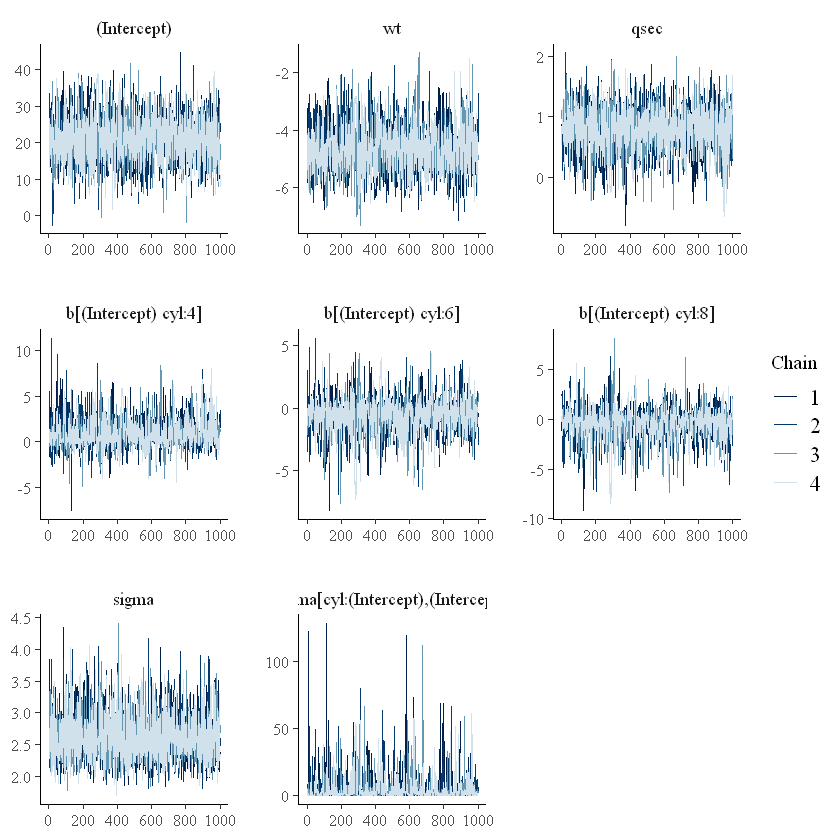

In [29]:
plot(fit_mixed, 'trace')

In [30]:
summary(fit_mixed)


Model Info:

 function:     stan_glmer
 family:       gaussian [identity]
 formula:      mpg ~ wt + qsec + (1 | cyl)
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 32
 groups:       cyl (3)

Estimates:
                                     mean   sd    2.5%   25%   50%   75%
(Intercept)                         21.0    6.0   9.7   16.9  20.9  24.7
wt                                  -4.6    0.8  -6.1   -5.2  -4.7  -4.2
qsec                                 0.8    0.4   0.0    0.6   0.8   1.0
b[(Intercept) cyl:4]                 0.9    1.5  -1.6    0.0   0.5   1.6
b[(Intercept) cyl:6]                -0.5    1.3  -3.6   -1.1  -0.2   0.1
b[(Intercept) cyl:8]                -0.4    1.5  -4.1   -1.0  -0.2   0.2
sigma                                2.6    0.4   2.0    2.4   2.6   2.8
Sigma[cyl:(Intercept),(Intercept)]   4.4    8.8   0.0    0.3   1.4   4.5
mean_PPD                            20.1    0.7  18.8   19.6  2

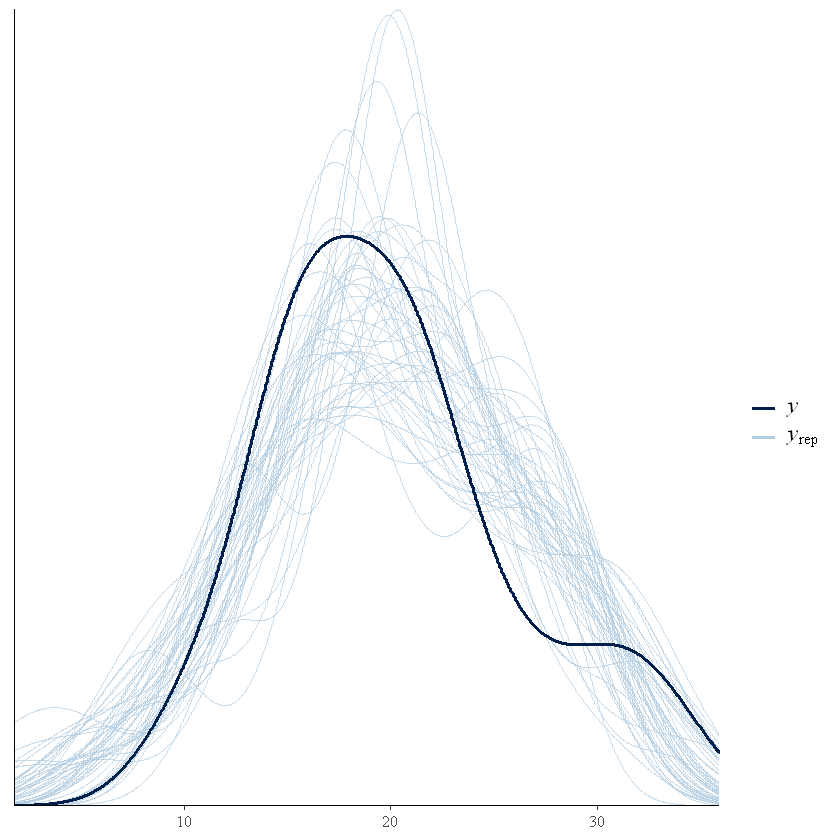

In [31]:
ppc_dens_overlay(y=cardata$mpg, yrep = posterior_predict(fit_mixed,draws=50))